In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# f(X_1, X_2) = -2.1 * X_0 + 0.4 * X_1 - 0.5
X = np.random.random((10000, 2))

y_orig = -2.1 * X[:, 0] + 0.4 * X[:, 1] - 0.5
y_noise = np.random.randn(10000) * 0.1
y = y_orig + y_noise

In [3]:
X_train = X[0:9000]
y_train = y[0:9000]
X_test = X[9001:len(X)]
y_test = y[9001:len(y)]

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

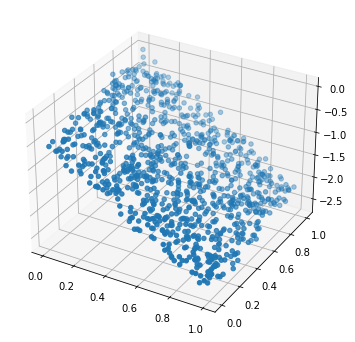

In [4]:
fig = plt.figure(figsize=(6, 6), facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_train[0:1000, 0], X_train[0:1000, 1], y_train[0:1000])
plt.plot

In [5]:
model = Sequential()
model.add(Dense(1, input_dim=2))
model.compile(optimizer='rmsprop', loss='mse')

In [6]:
hist = model.fit(X_train, y_train, epochs=10, verbose=1)
scores = model.evaluate(X_test, y_test)
print(scores)

Epoch 1/10
282/282 [==============================] - 0s 947us/step - loss: 3.1660
Epoch 2/10
282/282 [==============================] - 0s 947us/step - loss: 1.6480
Epoch 3/10
282/282 [==============================] - 0s 940us/step - loss: 0.7865
Epoch 4/10
282/282 [==============================] - 0s 972us/step - loss: 0.4665
Epoch 5/10
282/282 [==============================] - 0s 938us/step - loss: 0.3370
Epoch 6/10
282/282 [==============================] - 0s 929us/step - loss: 0.2385
Epoch 7/10
282/282 [==============================] - 0s 926us/step - loss: 0.1589
Epoch 8/10
282/282 [==============================] - 0s 933us/step - loss: 0.0996
Epoch 9/10
282/282 [==============================] - 0s 947us/step - loss: 0.0579
Epoch 10/10
32/32 [==============================] - 0s 719us/step - loss: 0.0209
0.020938700065016747


In [7]:
weights = model.get_weights()
weights

[array([[-1.7292941],
        [ 0.4452221]], dtype=float32),
 array([-0.716943], dtype=float32)]

In [8]:
X_0_mesh = np.linspace(0, 1.0, 11)
X_1_mesh = np.linspace(0, 1.0, 11)
X_0_mesh, X_1_mesh = np.meshgrid(X_0_mesh, X_1_mesh)
y_pred = X_0_mesh * weights[0][0, 0] + X_1_mesh * weights[0][1, 0] + weights[1][0]

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 432x288 with 0 Axes>

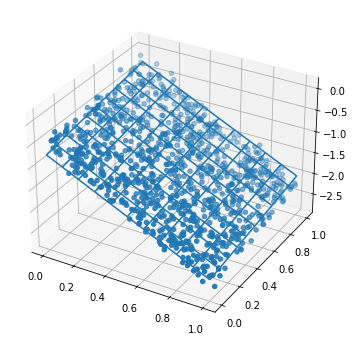

In [9]:
plt.clf()
fig = plt.figure(figsize=(6, 6), facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_test[:, 0], X_test[:, 1], y_test[:])
ax.plot_wireframe(X_0_mesh, X_1_mesh, y_pred)
plt.plot

In [10]:
# f(X_1, X_2) = 10 * X_0^2 + 10 * X_1^2 - 0.5
X = np.random.random((10000, 2))

y_orig = 10 * np.power(X[:, 0], 3) + 10 * np.power(X[:, 1], 3) - 0.5
y_noise = np.random.randn(10000) * 0.1
y = y_orig + y_noise

In [11]:
X_train = X[0:9000]
y_train = y[0:9000]
X_test = X[9001:len(X)]
y_test = y[9001:len(y)]

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

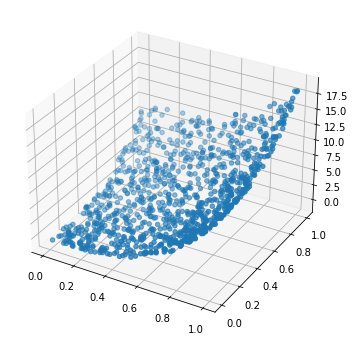

In [12]:
fig = plt.figure(figsize=(6, 6), facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_train[0:1000, 0], X_train[0:1000, 1], y_train[0:1000])
plt.plot

In [13]:
model = Sequential()
model.add(Dense(1, input_dim=2))
model.compile(optimizer='rmsprop', loss='mse')

In [14]:
hist = model.fit(X_train, y_train, epochs=10, verbose=1)
scores = model.evaluate(X_test, y_test)
print(scores)

Epoch 1/10
282/282 [==============================] - 0s 883us/step - loss: 33.8529
Epoch 2/10
282/282 [==============================] - 0s 918us/step - loss: 28.7181
Epoch 3/10
282/282 [==============================] - 0s 943us/step - loss: 24.2312
Epoch 4/10
282/282 [==============================] - 0s 929us/step - loss: 20.3668
Epoch 5/10
282/282 [==============================] - 0s 901us/step - loss: 17.1850
Epoch 6/10
282/282 [==============================] - 0s 926us/step - loss: 14.6158
Epoch 7/10
282/282 [==============================] - 0s 908us/step - loss: 12.7168
Epoch 8/10
282/282 [==============================] - 0s 891us/step - loss: 11.3929
Epoch 9/10
282/282 [==============================] - 0s 908us/step - loss: 10.5658
Epoch 10/10
32/32 [==============================] - 0s 656us/step - loss: 9.1824
9.182355880737305


In [15]:
weights = model.get_weights()
weights

[array([[1.4540765],
        [3.7877223]], dtype=float32),
 array([2.0643783], dtype=float32)]

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 432x288 with 0 Axes>

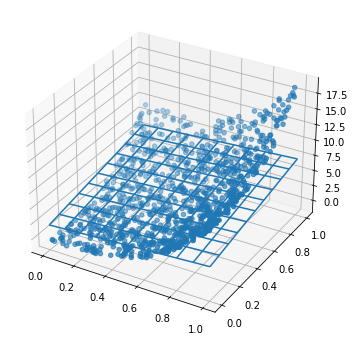

In [16]:
y_pred = X_0_mesh * weights[0][0, 0] + X_1_mesh * weights[0][1, 0] + weights[1][0]
plt.clf()
fig = plt.figure(figsize=(6, 6), facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_test[:, 0], X_test[:, 1], y_test[:])
ax.plot_wireframe(X_0_mesh, X_1_mesh, y_pred)
plt.plot